In [4]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier


# Set notebook mode to work in offline
pyo.init_notebook_mode()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

In [5]:
df=pd.read_csv("weather_prediction.csv")

In [6]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [7]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [8]:
df.shape

(8425, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [12]:
df.isnull().sum()*100

Date                  0
Location              0
MinTemp            7500
MaxTemp            6000
Rainfall          24000
Evaporation      351200
Sunshine         399400
WindGustDir       99100
WindGustSpeed     99100
WindDir9am        82900
WindDir3pm        30800
WindSpeed9am       7600
WindSpeed3pm      10700
Humidity9am        5900
Humidity3pm       10200
Pressure9am      130900
Pressure3pm      131200
Cloud9am         242100
Cloud3pm         245500
Temp9am            5600
Temp3pm            9600
RainToday         24000
RainTomorrow      23900
dtype: int64

In [14]:
data=df.copy()

In [15]:
for feature in data:
    if data[feature].isnull().sum()>0:
        print(feature,":", np.round(data[feature].isnull().mean(),4),'%')

MinTemp : 0.0089 %
MaxTemp : 0.0071 %
Rainfall : 0.0285 %
Evaporation : 0.4169 %
Sunshine : 0.4741 %
WindGustDir : 0.1176 %
WindGustSpeed : 0.1176 %
WindDir9am : 0.0984 %
WindDir3pm : 0.0366 %
WindSpeed9am : 0.009 %
WindSpeed3pm : 0.0127 %
Humidity9am : 0.007 %
Humidity3pm : 0.0121 %
Pressure9am : 0.1554 %
Pressure3pm : 0.1557 %
Cloud9am : 0.2874 %
Cloud3pm : 0.2914 %
Temp9am : 0.0066 %
Temp3pm : 0.0114 %
RainToday : 0.0285 %
RainTomorrow : 0.0284 %


In [16]:
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [18]:
data.duplicated().sum()

1663

In [19]:
cor = data.corr()

In [20]:
categorical_feature = [feature for feature in data.columns if data[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

7


['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [21]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
print("The length of Numerical_values is :",len(numerical_feature))
numerical_feature


The length of Numerical_values is : 16


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [22]:
today = data["RainToday"].value_counts()[:35]
tomorow = data['RainTomorrow'].value_counts()[:35]

In [23]:
gust = data['WindGustDir'].value_counts()[:50]
ninam = data['WindDir9am'].value_counts()[:50]
threpm = data['WindDir3pm'].value_counts()[:50]

        Exploratory Data Analysis
3.1 Line Plots¶

In [24]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("RainToday","RainTomorrow", "WindGustDir"))

fig.add_trace(go.Scatter(x=today.values, y=today.index),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=tomorow.values, y=tomorow.index),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=gust.values, y=gust.index),
                 row=2, col=1)

fig.update_layout(showlegend=False, title_text="Raining Tomorrow and Today Comparison with WindGustDir")
fig.show()

In [25]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("RainToday","RainTomorrow", "WindGustDir"))

fig.add_trace(go.Scatter(x=today.values, y=today.index),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=tomorow.values, y=tomorow.index),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=ninam.values, y=ninam.index),
                 row=2, col=1)

fig.update_layout(showlegend=False, title_text="Raining Tomorrow and Today Comparison with WindDir9:am")
fig.show()

In [26]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=today.index, values=today.values, name="RainToday"),
              1, 1)
fig.add_trace(go.Pie(labels=tomorow.index, values=tomorow.values, name="RainTommorrow"),
              1, 2)

# # Use `hole` to create a donut-like pie chart
# fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(title_text="Comparison of the Wheather for Today Raining and Tomorrow Raining ")
fig.show()

In [27]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gust.index, values=gust.values, name="WindGustDir"),
              1, 1)
fig.add_trace(go.Pie(labels=ninam.index, values=ninam.values, name="WindDir9am"),
              1, 2)


fig.update_layout(title_text="Comparison of the WindGustDir and  WindDir9am")
fig.show()

In [29]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=gust.index, values=gust.values, name="WindGustDir", pull=[0, 0, 0.2, 0]),
              1, 1)
fig.add_trace(go.Pie(labels=ninam.index, values=ninam.values, name="WindDir9am", pull=[0, 0, 0.2, 0]),
              1, 2)

fig.update_layout(title_text="Comparison of the WindGustDir and  WindDir9am")
fig.show()

<AxesSubplot:>

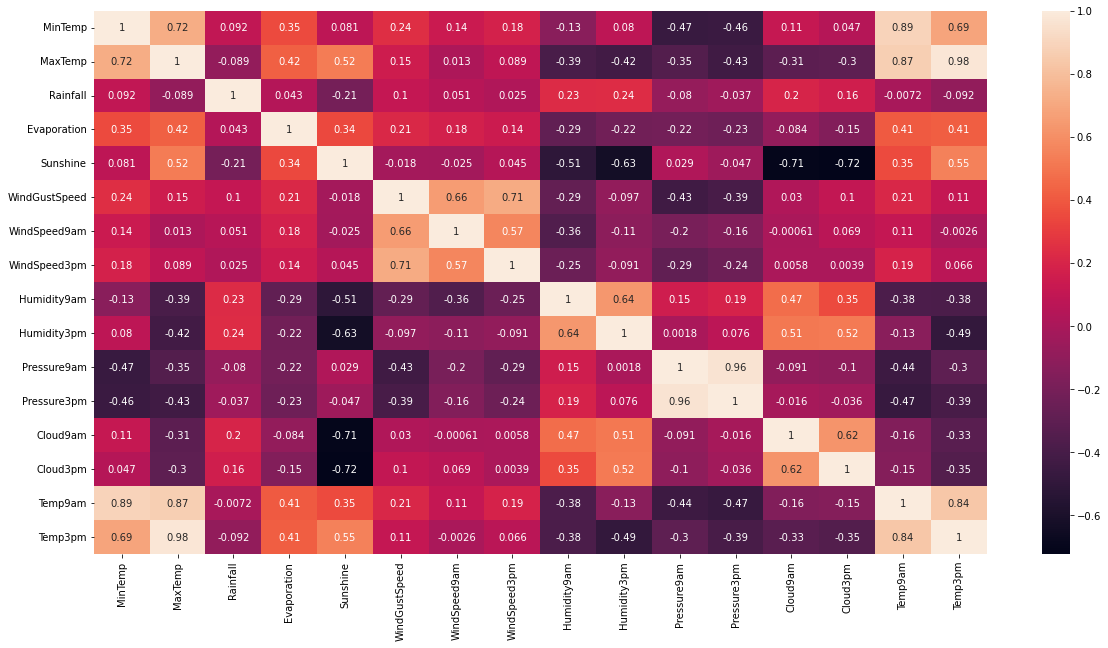

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)

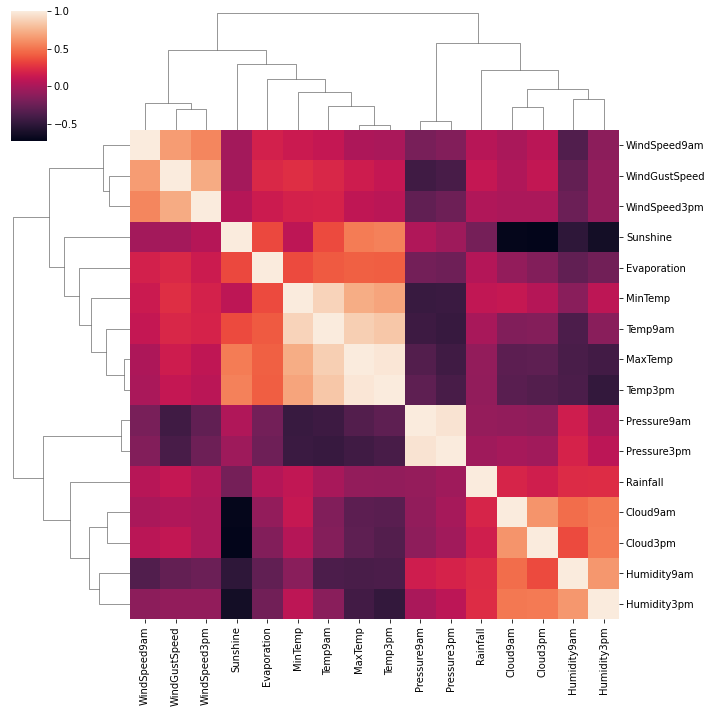

In [32]:
sns.clustermap(cor)

In [33]:
fig = px.imshow(cor,text_auto=True,aspect="auto")
fig.show()

                jointplot of data

<Figure size 1440x720 with 0 Axes>

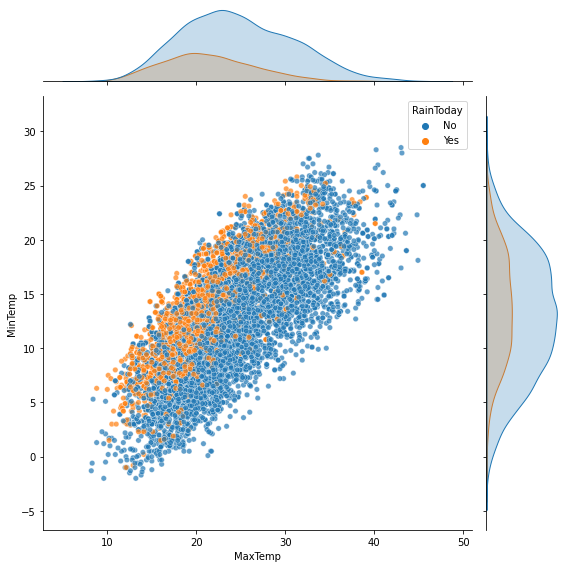

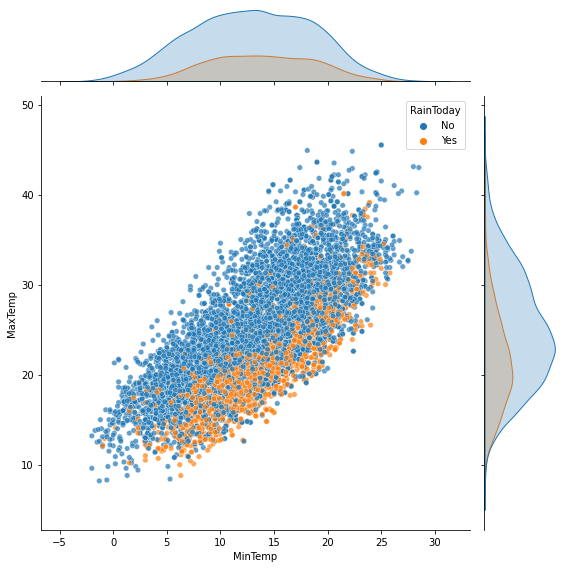

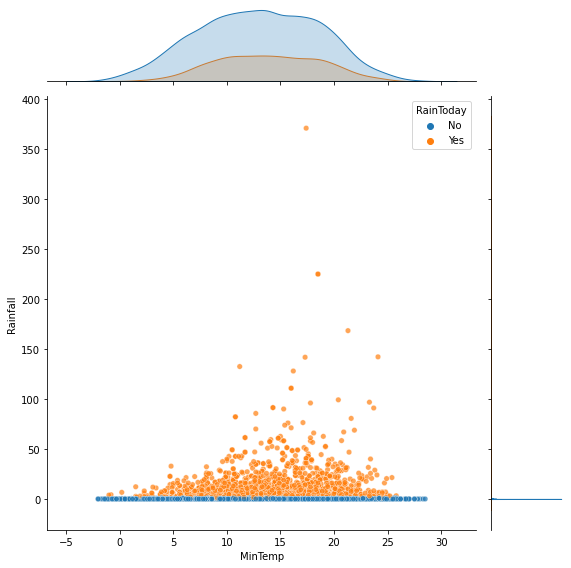

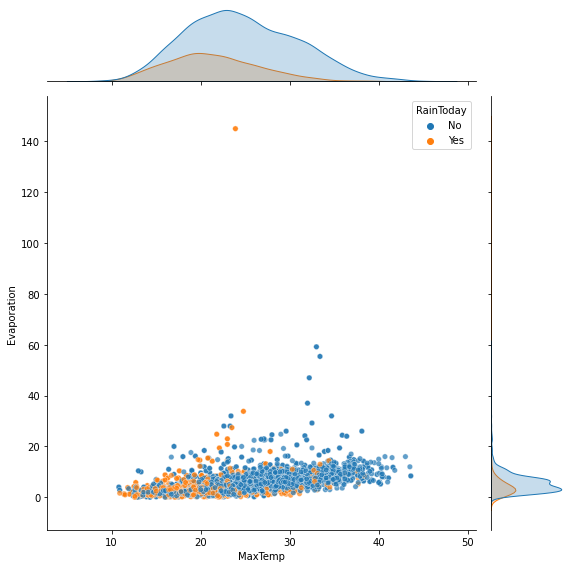

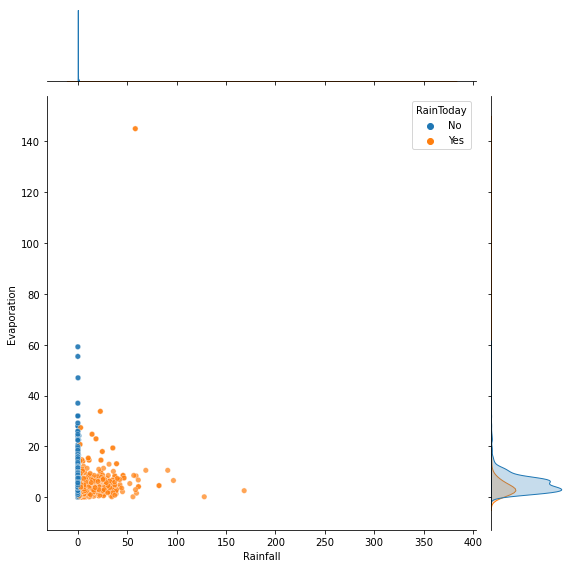

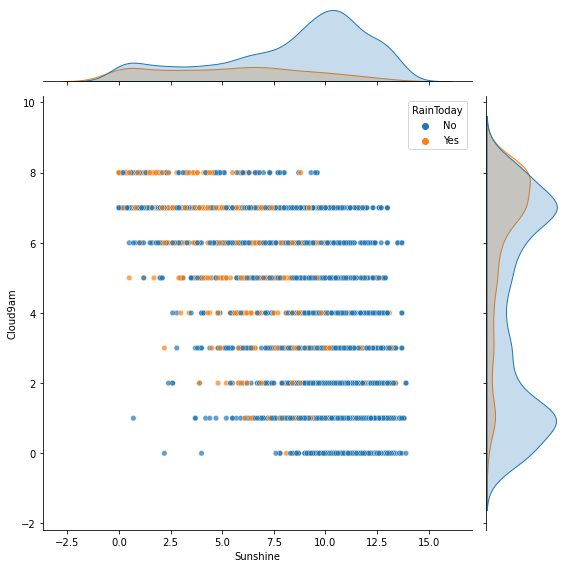

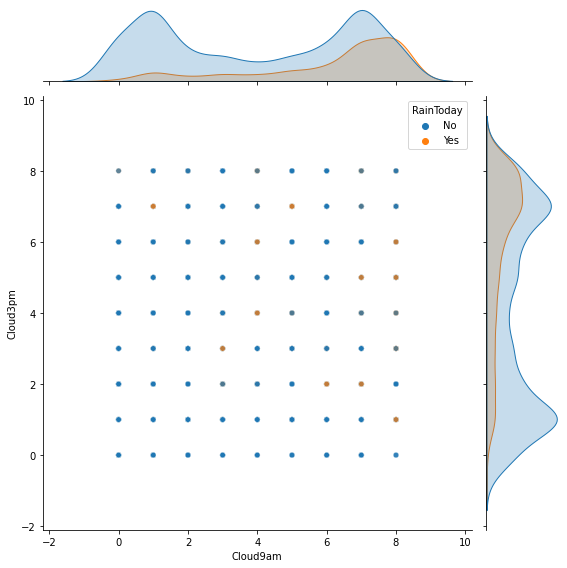

In [34]:
plt.figure(figsize=(20,10))
sns.jointplot(data=data, x="MaxTemp", y="MinTemp", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="MinTemp", y="MaxTemp", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="MinTemp", y="Rainfall", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="MaxTemp", y="Evaporation", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="Rainfall", y="Evaporation", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="Sunshine", y="Cloud9am", hue="RainToday",height=8,s=30,alpha=0.7)
sns.jointplot(data=data, x="Cloud9am", y="Cloud3pm", hue="RainToday",height=8,s=30,alpha=0.7)

            Visualisation of the Descriptive Analysis of the Data

In [35]:
data.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

With Respect to the Standard Deviation of Data

In [37]:
data.describe().T.style.bar(subset=['std'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

                3 With Respect to the Min Value of Data

With Respect to the Max Value of the Data

In [38]:
data.describe().T.style.bar(subset=['max'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

With Respect to the First Quartile of Data

In [39]:
data.describe().T.style.bar(subset=['25%'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

In [41]:
data.dropna(inplace=True)

In [42]:
categorical_feature

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [43]:
le = LabelEncoder()
data['WindGustDir'] = le.fit_transform(data['WindGustDir'])
data['WindDir9am'] = le.fit_transform(data['WindDir9am'])
data['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
data['RainToday'] = le.fit_transform(data['RainToday'])
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

            5- Feature Engineering

In [44]:
X = data.drop(['RainTomorrow'],axis=1)
y = data[['RainTomorrow']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=42)

             Standardization of the Data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [58]:
scaler = StandardScaler()